#1. What is Pandas

In [ ]:
https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&ab_channel=DataSchool

#2. How do I read a tabular data file into pandas?

This approach works well for tab separated data and it assumes that the first row is a header

In [ ]:
import pandas as pd
orders = pd.read_table("http://bit.ly/chiporders")
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


This time around we have a problem. We need to get rid of the pipe characters and create new columns

In [ ]:
pd.read_table("http://bit.ly/movieusers")

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101
...,...
937,939|26|F|student|33319
938,940|32|M|administrator|02215
939,941|20|M|student|97229
940,942|48|F|librarian|78209


In [ ]:
pd.read_table("http://bit.ly/movieusers", sep ="|")

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101
...,...,...,...,...,...
937,939,26,F,student,33319
938,940,32,M,administrator,02215
939,941,20,M,student,97229
940,942,48,F,librarian,78209


But now we have the problem, that the first row gets interpreted as a header. Let's take care of that 

In [ ]:
pd.read_table("http://bit.ly/movieusers", sep ="|", header= None)

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Let's definde the column names

In [ ]:
user_cols = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_table("http://bit.ly/movieusers", sep="|", header= None, names= user_cols)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# 3. How do I select a pandas Series from a DataFrame?

Both of the options below have the same effect

In [ ]:
ufo = pd.read_table("http://bit.ly/uforeports", sep=",")
ufo = pd.read_csv("http://bit.ly/uforeports")

In [ ]:
type(ufo)

pandas.core.frame.DataFrame

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


We can access out DataFrame Columns using the bracket notation

In [ ]:
ufo["City"]

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

Accessing our DataFrame with brackets returns a Series

In [ ]:
type(ufo["City"])

pandas.core.series.Series

You can even concatenate two Pandas Series, similar to how you would if you were to concatenate Python strings

In [ ]:
ufo.City + ", " + ufo.State

0                      Ithaca, NY
1                 Willingboro, NJ
2                     Holyoke, CO
3                     Abilene, KS
4        New York Worlds Fair, NY
                   ...           
18236              Grant Park, IL
18237             Spirit Lake, IA
18238             Eagle River, WI
18239             Eagle River, WI
18240                    Ybor, FL
Length: 18241, dtype: object

If you want to assign this new pandas Series to the dataframe, you have to use bracket notation

In [ ]:
ufo["Location"] = ufo.City + ", " + ufo.State

ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


#4. Why do some pandas commands end with parentheses, and others don't?

In [ ]:
movies = pd.read_csv("http://bit.ly/imdbratings")

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [ ]:
movies.shape

(979, 6)

In [ ]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [ ]:
type(movies)

pandas.core.frame.DataFrame

movies is a Dataframe
- It does have its own attributes `.attribute`
  - descriptions ("What is this DF about?")
- It has its own methods `.method()`
  - actions ("What can this DF do?")


E.g. if I were an object 
- attributes:
  - kay.height, kay.weight
- methods:
  - kay.walk(), kay.speak()

Unlike pandas functions, methods don't have to take parameters, but some do. 

In [ ]:
movies.describe(include=["object"])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,True Grit,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


#5.  How do I rename columns in a pandas DataFrame?

In [ ]:
import pandas as pd 
ufo = pd.read_csv("http://bit.ly/uforeports")

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

Method #1 use dataframe.rename

In [ ]:
 ufo.rename(columns = {"Colors Reported": "Colors_Reported", 
                       "Shape Reported": "Shape_Reported"}, 
            inplace = True)

In [ ]:
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

Method #2 use a regular Python list

In [ ]:
ufo_cols = ["city", "colors reported", "shape reported", "state", "time"]

In [ ]:
ufo.columns = ufo_cols

In [ ]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

Method #3 rename the columns while you read in the file

In [ ]:
ufo_cols = ["city", "colors reported", "shape reported", "state", "time"]

In [ ]:
ufo = pd.read_csv("http://bit.ly/uforeports", names = ufo_cols, header = 0)
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [ ]:
# Replace spaces with underscores in our header
ufo.columns = ufo.columns.str.replace(" ", "_")

In [ ]:
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

#6.  How do I remove columns from a pandas DataFrame

In [ ]:
import pandas as pd 
ufo = pd.read_csv("http://bit.ly/uforeports")

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.shape

(18241, 5)

Drop a specific column by using its name
- Axis 0 is the vertical axis (from top to bottom)
- Axis 1 is the horizontal axis (from left to right)

The take away for pandas is the following:
- axis = 1 drops a column
- axis = 0 drops a row

In [ ]:
ufo.drop("Colors Reported", axis=1, inplace = True)
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


Here's how you can drop multiple columns at once

In [ ]:
ufo.drop(["City", "State"], axis = 1, inplace =True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


Here's an example of how to drop a row 

In [ ]:
ufo.drop(0, axis = 0, inplace = True)

In [ ]:
ufo.head()

,Shape Reported,Time
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30


Here's how to drop multiple rows

In [ ]:
ufo.drop([1,2], axis = 0, inplace = True)
ufo.head()

,Shape Reported,Time
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00
7,DISK,7/15/1936 0:00


#7. How do I sort a pandas DataFrame or Series?

In [ ]:
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
movies = pd.read_csv("http://bit.ly/imdbratings")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


Here's how we can sort a pandas Series

- We can use the sort_values method and add the ascending parameter to get ascending or descending values.

- The sort_values method does not change the dataframe unless you tell it to do the operation inplace

In [ ]:
movies["title"].sort_values(ascending = False, inplace = False)

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

Here's how we can sort the movies DataFrame by the title the new way

In [ ]:
movies.sort_values("title").head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [ ]:
movies.sort_values("duration", ascending = True).head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


Here's how to sort a dataframe by multiple columns

In [ ]:
movies.sort_values(["content_rating", "duration"])

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
...,...,...,...,...,...,...
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


# 8. How do I filter rows of a pandas DataFrame by column value?

In [ ]:
movies = pd.read_csv("http://bit.ly/imdbratings")

In [ ]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies.shape

(979, 6)

In [ ]:
booleans = []
for length in movies.duration:
  if length >= 200:
    booleans.append(True)
  else:
    booleans.append(False)

In [ ]:
booleans[0:5]

[False, False, True, False, False]

In [ ]:
len(booleans)

979

Now convert the booleans list into a pandas Series

In [ ]:
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In the last step we pass is_long to the movies dataframe

We will be returned a dataframe with movies with duration over 200 minutes

In [ ]:
movies[is_long].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


We went through the long way to get to our result with the creation of a foor loop

Now we'll do it differently

In [ ]:
is_long = movies.duration >= 200
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

- We get the very same result as before

- Pandas is smart enough to do a comparison on every item in a series 

In [ ]:
movies[is_long].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


Here's on last thing we can do to shorten our code
- we don't even need to create a separate pandas Series

In [ ]:
movies[movies.duration >= 200].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


Let's consider we only want to look at a specific genre of movies. We can do that with the notation we learnt above 

In [ ]:
movies[movies.genre == "Crime"].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."


We can even access specific rows after we're done filtering

In [ ]:
movies[movies.duration >= 200]["genre"]

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

A more modern way to approach the code from above is to use `.loc`

In [ ]:
movies.loc[movies.duration >= 200, "genre"]

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

#9. How do I apply multiple filter criteria to a pandas DataFrame?

In [ ]:
movies = pd.read_csv("http://bit.ly/imdbratings")

In [ ]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies[movies.duration >= 200].head(2)

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."


How do I get movies that are longer than 200 minutes and of the genre Drama?
- A logical step would be to add an and operator within the square brackets

In [ ]:
movies[movies.duration >= 200 and movies.genre == "Drama"]

ValueError: ignored

- This won't work because pandas does not know in which order to evaluate the statements within the square brackets
- We need to add some round brackets to communicate the order of execution

In [ ]:
movies[(movies.duration >= 200) and (movies.genre == "Drama")]

ValueError: ignored

There's another reason why this code doesn't work. We need to replace our `and`with an ampersand `&`

- We need to use `&`because this is how ternary operations are being evaluated by pandas (At least that's what I think)
- & is used for and 
- | is used for or 

In [ ]:
movies[(movies.duration >= 200) & (movies.genre == "Drama")]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


If you have many or conditions you want to check for it's tempting to write long code like this 

In [ ]:
movies[(movies.genre == "Crime") | (movies.genre == "Drama") | (movies.genre == "Action")].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


The above approach works just fine, but we can use a neater approach to simplify our expression by using a Series method `isin`

In [ ]:
movies.genre.isin(["Crime", "Drama", "Action"])

0       True
1       True
2       True
3       True
4       True
       ...  
974    False
975    False
976     True
977    False
978     True
Name: genre, Length: 979, dtype: bool

We can now use the generated series to filter our dataframe

In [ ]:
movies[movies.genre.isin(["Crime", "Drama", "Action"])].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies[movies.genre.isin(["Crime", "Drama", "Action"])] == movies[(movies.genre == "Crime") | (movies.genre == "Drama") | (movies.genre == "Action")]

,star_rating,title,content_rating,genre,duration,actors_list
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
970,True,True,True,True,True,True
972,True,True,True,True,True,True
973,True,True,True,True,True,True
976,True,True,True,True,True,True


# 10. Miscellaneous

In [ ]:
import pandas as pd
ufo = pd.read_csv("http://bit.ly/uforeports")

In [ ]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

1. How can we read only two columns from a csv file and ignore the rest


In [ ]:
ufo = pd.read_csv("http://bit.ly/uforeports", usecols=["City", "State"])
ufo.columns

Index(['City', 'State'], dtype='object')

In [ ]:
ufo = pd.read_csv("http://bit.ly/uforeports", usecols=[0, 4])
ufo.columns

Index(['City', 'Time'], dtype='object')

2. What is the fastest method to readfrom a csv file 

In [ ]:
ufo = pd.read_csv("http://bit.ly/uforeports", nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


3. How do DataFrames and Series work with regard to selecting individual entries and iterations?

In [ ]:
# Turns out Pandas Series are iterable 
for c in ufo.City:
  print(c)

Ithaca
Willingboro
Holyoke


To iterate through a dataframe there are special methods pandas wants us to use
- `iterrows()`


In [ ]:
for index, row in ufo.iterrows():
  print(index, row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


4. What's the best way to drop every non-numeric column from a DataFrame?

In [ ]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [ ]:
import numpy as np 
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [ ]:
drinks.select_dtypes(include=[np.number])

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9
...,...,...,...,...
188,333,100,3,7.7
189,111,2,1,2.0
190,6,0,0,0.1
191,32,19,4,2.5


5. How is the include parameter used in df.describe ? 

In [ ]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


We can either pass it "all"

In [ ]:
drinks.describe(include ="all")

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Cambodia,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


Or we can pass in a list of dtypes 

In [ ]:
drinks.describe(include =["object", "float64"])

,country,total_litres_of_pure_alcohol,continent
count,193,193.000000,193
unique,193,NaN,6
top,Cambodia,NaN,Africa
freq,1,NaN,53
mean,NaN,4.717098,NaN
std,NaN,3.773298,NaN
min,NaN,0.000000,NaN
25%,NaN,1.300000,NaN
50%,NaN,4.200000,NaN
75%,NaN,7.200000,NaN


In [ ]:
drinks.describe(include =["object"])

,country,continent
count,193,193
unique,193,6
top,Cambodia,Africa
freq,1,53


# 11. How do I use the "axis" parameter in pandas?

In [ ]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.drop("continent", axis =1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [ ]:
drinks.drop(2, axis =0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [ ]:
drinks.mean() # default -> axis = 0

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [ ]:
drinks.mean(axis = 1)

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

In [ ]:
drinks.mean(axis ="index")

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [ ]:
drinks.mean(axis ="columns")

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

# 12. How do I use string methods in pandas? 

Here's an example of a usual python string method

In [ ]:
"hello".upper()

'HELLO'

In [ ]:
orders = pd.read_table("http://bit.ly/chiporders")

In [ ]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


The command below will not work


In [ ]:
# orders.item_name.upper()

AttributeError: ignored

If we want to use string methods on a series, we need to use `.str` before calling the method

In [ ]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [ ]:
orders.item_name.str.contains("Chicken")

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

Tipp: Look for `string handling` in the pandas documentation to learn more about all the different string methods

In [ ]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


We can even chain str. methods
- Let's say we want to remove the brackets in choice_description


In [ ]:
orders.choice_description.str.replace("[", "").str.replace("]", "")

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

Here's the same concept just with a regular expression

In [ ]:
orders.choice_description.str.replace("[\[\]]", "")

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

# 13. How do I change the data type of a pandas Series?

In [ ]:
import pandas as pd 
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [ ]:
drinks.beer_servings.astype(float)

0        0.0
1       89.0
2       25.0
3      245.0
4      217.0
       ...  
188    333.0
189    111.0
190      6.0
191     32.0
192     64.0
Name: beer_servings, Length: 193, dtype: float64

If we want to change our existing dataframe we can simply overwrite our current dataframe

In [ ]:
drinks["beer_servings"] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

## How to define the type of each column before reading the csv?

In [ ]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry",
                     dtype={"beer_servings": float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [ ]:
orders = pd.read_table("http://bit.ly/chiporders")
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

the item price is an object, ideally we can change it to a number

In [ ]:
orders.item_price.str.replace("$", "")

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [ ]:
orders.item_price = orders.item_price.str.replace("$", "")
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [ ]:
orders.item_price = orders.item_price.str.replace("$", "").astype(float)
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [ ]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [ ]:
orders.item_name.str.contains("Chicken").head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [ ]:
orders.item_name.str.contains("Chicken").astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int64

# 14. When should I use a "groupby" in pandas?

In [ ]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


Let's answer the following question: 

- What is the average beer serving per country? 

In [ ]:
beer_per_country = drinks.groupby("country")["beer_servings"].mean()
beer_per_country

country
Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
              ... 
Venezuela      333
Vietnam        111
Yemen            6
Zambia          32
Zimbabwe        64
Name: beer_servings, Length: 193, dtype: int64

In [ ]:
beer_per_country.sort_values(ascending=False)

country
Namibia           376
Czech Republic    361
Gabon             347
Germany           346
Lithuania         343
                 ... 
Pakistan            0
San Marino          0
Saudi Arabia        0
Somalia             0
Afghanistan         0
Name: beer_servings, Length: 193, dtype: int64

In [ ]:
# By continent
drinks.groupby("continent")["beer_servings"].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [ ]:
drinks[drinks["continent"] == "Africa"].beer_servings.mean()

61.471698113207545

Remember:
- If you can phrase your problem as a `forEach` it's probably a good candidate for a `groupby`
- e.g. for each continent, what is the mean beer serving?

More: 
- Mean is not the only aggregation function you can use.

- Here's an example with max


In [ ]:
drinks.groupby("continent")["beer_servings"].max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [ ]:
drinks.groupby("continent")["beer_servings"].min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

Even more powerful is `agg` which allows us to specify multiple aggregation functions at once

In [ ]:
drinks.groupby("continent")["beer_servings"].agg(["count", "min", "max", "mean"])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


When you don't specify what column you're interested in, the groupby operation does the aggregation over all numerical columns

In [ ]:
drinks.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


Here's how you can quickly plot the results

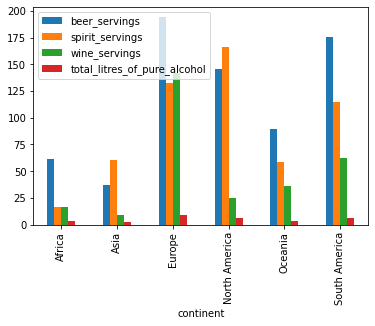

In [ ]:
import matplotlib.pyplot as plt 

drinks.groupby("continent").mean().plot(kind="bar");

# 15. How do I explore a pandas Series?

In [ ]:
movies = pd.read_csv("http://bit.ly/imdbratings")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Pandas Series `.describe()`
- count : non null values
- unique : unique values 
- top: most frequent value 
- freq: frequency of top

In [ ]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

If we want more info on the values and how frequent they occur we can use value_counts

In [ ]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

If we set normalize to true, we get back the values as percentages

In [ ]:
movies.genre.value_counts(normalize = True) #* 100

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

The output of value counts is itself a Series

In [ ]:
type(movies.genre.value_counts(normalize = True))

pandas.core.series.Series

As a result we can use Series methods 

In [ ]:
movies.genre.value_counts(normalize = True).head()

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Name: genre, dtype: float64

Here's all the unique values of our genre column

In [ ]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

`nunique()` returns the number of unique values

In [ ]:
movies.genre.nunique()

16

A `crosstab()` shows us all the possible combinations between two columns and the number of occurences of each combination

In [ ]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Describe also works on numeric columns

In [ ]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [ ]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
       ..
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

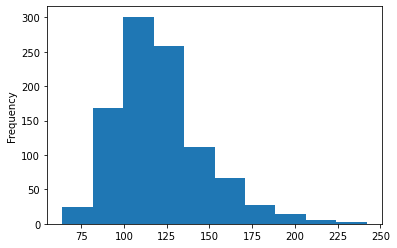

In [ ]:
movies.duration.plot(kind="hist")

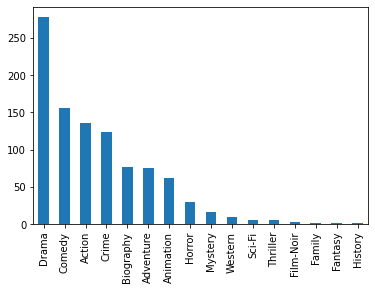

In [ ]:
movies.genre.value_counts().plot(kind="bar")

# 16. How do I handle missing values in pandas?

In [ ]:
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


Let's use `isnull()`
- returns false if value is not missing 
- returns true if value is missing

In [ ]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [ ]:
# This is the inverse method
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


Let's get the number of missing values in each of the columns

In [ ]:
ufo.isnull().sum() #default -> axis = 0

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [ ]:
# True will get converted into 1
# False will get converted into 0 
pd.Series([True, False, True]).sum()

2

In [ ]:
ufo.City.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
18236    False
18237    False
18238    False
18239    False
18240    False
Name: City, Length: 18241, dtype: bool

Here's how we can look at the portion of the datafram that has no city reported

In [ ]:
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


## How do I treat missing values? 
One method is to drop the rows with missing values

In [ ]:
ufo.shape

(18241, 5)

In [ ]:
# drop a row if any of its values is 
# We loose almost all except for 2485 rows
ufo.dropna(how="any").shape

(2486, 5)

In [ ]:
# doesn't make any changes in this case 
# because State and Time have no missing values
ufo.dropna(how="all").shape

(18241, 5)

In [ ]:
# subset gives us the option to consider only the specified columns
ufo.dropna(subset=["City", "Shape Reported"], how = "any").shape

(15576, 5)

In [ ]:
ufo.dropna(subset=["City", "Shape Reported"], how = "all").shape

(18237, 5)

Here's how we can fill missing values

In [ ]:
ufo["Shape Reported"].value_counts(dropna =False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
FLARE           1
HEXAGON         1
DOME            1
PYRAMID         1
Name: Shape Reported, dtype: int64

In [ ]:
ufo["Shape Reported"].fillna(value="VARIOUS", inplace=True)
ufo["Shape Reported"].value_counts()

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
DOME            1
HEXAGON         1
FLARE           1
PYRAMID         1
Name: Shape Reported, dtype: int64

# 17. What do I need to know about the pandas index (Part 1)

In [20]:
import pandas as pd 
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [21]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [22]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [23]:
drinks.shape

(193, 6)

In [24]:
users = pd.read_csv("http://bit.ly/movieusers", header= None, sep = "|")
users.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


There are 3 main reasons why we use indices
1. Identification
2. Selection
3. Alignment

In [25]:
# Identification 
drinks[drinks.continent == "South America"]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [26]:
# Selection 
drinks.loc[23, "beer_servings"]

245

In [27]:
drinks.set_index("country", inplace = True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [28]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [29]:
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [30]:
drinks.shape

(193, 5)

In [31]:
drinks.loc["Brazil", "beer_servings"]

245

In [32]:
drinks.index.name = None 
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [33]:
drinks.index.name = "country"
drinks.reset_index(inplace = True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [34]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [35]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [44]:
drinks.describe().loc["25%"]

beer_servings                   20.0
spirit_servings                  4.0
wine_servings                    1.0
total_litres_of_pure_alcohol     1.3
Name: 25%, dtype: float64

In [45]:
drinks.describe().loc["25%", "beer_servings"]

20.0

# 18. What do I need to know about the pandas index (Part 2)

In [47]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [48]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [49]:
drinks.set_index("country", inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [50]:
drinks.continent.head()

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [51]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [52]:
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [53]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12])

In [54]:
drinks.continent.value_counts()["Africa"]

53

In [55]:
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [57]:
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [59]:
# Alignment - put data together even if it's not the same length
people = pd.Series([3000000, 85000], index=["Albania", "Andorra"], name="population")
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [60]:
drinks.beer_servings * people 

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
                  ...     
Venezuela              NaN
Vietnam                NaN
Yemen                  NaN
Zambia                 NaN
Zimbabwe               NaN
Length: 193, dtype: float64

In [61]:
pd.concat([drinks, people], axis=1).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


# 19. How do I select multiple rows and columns from a pandas DataFrame?

In [63]:
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [64]:
# filtering/selecting by label
ufo.loc[0,:] #[row, columns]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [66]:
ufo.loc[[0,1,2] , :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [67]:
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [69]:
# if you leave of the argument for columns pandas assumes that you mean ,:
# This is not recommended: Explicit is better than implicit
ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [70]:
ufo.loc[[1,4,44],:]

,City,Colors Reported,Shape Reported,State,Time
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00


In [71]:
ufo.loc[:, "City"]

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

In [72]:
ufo.loc[:, ["City", "State"]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


In [73]:
ufo.loc[:, "City":"State"]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


In [74]:
ufo.loc[0:3, "City": "State"]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS


In [77]:
ufo.head(3).drop("Time", axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [78]:
 ufo[ufo.City == "Oakland"]

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


In [83]:
ufo.loc[ufo.City == "Oakland", :]

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


In [84]:
ufo.loc[ufo.City == "Oakland", "State"]

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [85]:
# I loc is inclusive of the first number and exclusive of the second number
ufo.iloc[:, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


In [86]:
ufo.iloc[1:4, 0:2]

,City,Colors Reported
1,Willingboro,NaN
2,Holyoke,NaN
3,Abilene,NaN


In [88]:
ufo.loc[1:4, "City":"Colors Reported"]

,City,Colors Reported
1,Willingboro,NaN
2,Holyoke,NaN
3,Abilene,NaN
4,New York Worlds Fair,NaN


In [89]:
ufo.iloc[0:3, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [90]:
for i in range(4):
  print(i)

0
1
2
3


In [91]:
ufo[["City", "State"]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


In [94]:
ufo.loc[:,["City","State"]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


In [95]:
# This is confusing, be more explicit, use loc or iloc
ufo[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [96]:
ufo.iloc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [97]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry", index_col ="country")

In [98]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


# 20. When should I use the "inplace" parameter in pandas?

In [120]:
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [103]:
ufo.shape

(18241, 5)

In [108]:
ufo.drop("City", axis = 1).head(3)

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00


In [109]:
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [110]:
ufo.drop("City", axis = 1, inplace =True)

In [111]:
ufo.head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


We can experiment with our dataset without actually changing it, by setting the inplace value to false

In [116]:
ufo.dropna(how ="any", inplace =False ).shape

(2490, 4)

In [115]:
ufo.shape

(18241, 4)

In [122]:
ufo.set_index("Time").head()

,City,Colors Reported,Shape Reported,State
Time,,,,
6/1/1930 22:00,Ithaca,NaN,TRIANGLE,NY
6/30/1930 20:00,Willingboro,NaN,OTHER,NJ
2/15/1931 14:00,Holyoke,NaN,OVAL,CO
6/1/1931 13:00,Abilene,NaN,DISK,KS
4/18/1933 19:00,New York Worlds Fair,NaN,LIGHT,NY


In [123]:
ufo = ufo.set_index("Time")

In [124]:
ufo.head()

,City,Colors Reported,Shape Reported,State
Time,,,,
6/1/1930 22:00,Ithaca,NaN,TRIANGLE,NY
6/30/1930 20:00,Willingboro,NaN,OTHER,NJ
2/15/1931 14:00,Holyoke,NaN,OVAL,CO
6/1/1931 13:00,Abilene,NaN,DISK,KS
4/18/1933 19:00,New York Worlds Fair,NaN,LIGHT,NY


In [128]:
ufo.reset_index("Time", inplace=True)

In [129]:
ufo.head()

,Time,City,Colors Reported,Shape Reported,State
0,6/1/1930 22:00,Ithaca,NaN,TRIANGLE,NY
1,6/30/1930 20:00,Willingboro,NaN,OTHER,NJ
2,2/15/1931 14:00,Holyoke,NaN,OVAL,CO
3,6/1/1931 13:00,Abilene,NaN,DISK,KS
4,4/18/1933 19:00,New York Worlds Fair,NaN,LIGHT,NY


In [131]:
# Here's how the default valueinplace = False allows us to experiment
ufo.fillna(method="bfill").tail()

,Time,City,Colors Reported,Shape Reported,State
18236,12/31/2000 23:00,Grant Park,RED,TRIANGLE,IL
18237,12/31/2000 23:00,Spirit Lake,RED,DISK,IA
18238,12/31/2000 23:45,Eagle River,RED,LIGHT,WI
18239,12/31/2000 23:45,Eagle River,RED,LIGHT,WI
18240,12/31/2000 23:59,Ybor,NaN,OVAL,FL


In [132]:
ufo.fillna(method="ffill").tail()

,Time,City,Colors Reported,Shape Reported,State
18236,12/31/2000 23:00,Grant Park,RED,TRIANGLE,IL
18237,12/31/2000 23:00,Spirit Lake,RED,DISK,IA
18238,12/31/2000 23:45,Eagle River,RED,DISK,WI
18239,12/31/2000 23:45,Eagle River,RED,LIGHT,WI
18240,12/31/2000 23:59,Ybor,RED,OVAL,FL
